In [14]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

df_adult = pd.read_csv("adult.data",
                 header=None,
                 encoding='utf-8',
                na_values=[' ?', '? '])

df_adult.columns = ['age', 'workclass', 'fnlwgt', 'education',
                   'education-num', 'marital-status', 'occupation',
                   'relationship', 'race', 'sex',
                   'capital-gain', 'capital-loss',
                   'hours-per-week', 'native-country', 'Listing of attributes']

df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing of attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df_adult['Listing of attributes'] = df_adult['Listing of attributes'].replace(' <=50K', 0)
df_adult['Listing of attributes'] = df_adult['Listing of attributes'].replace(' >50K', 1)
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing of attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
df = df_adult.dropna(axis=0,how='any')

In [17]:
df = pd.get_dummies(df)

In [18]:
from sklearn.model_selection import train_test_split
n = df.shape[1]
y = df['Listing of attributes']
del df['Listing of attributes']
X = df
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler ,MaxAbsScaler ,RobustScaler

sc = MaxAbsScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
sc.fit(x_test)
X_test_std = sc.transform(x_test)

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn import metrics

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1596
Accuracy: 0.8236
AUC: 0.7208


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

mlp = MLPClassifier(random_state=1, max_iter=500).fit(X_train_std, y_train)
y_pred = mlp.predict(X_test_std)

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f'%accuracy_score(y_test,y_pred))
print('Accuracy: %.3f'%mlp.score(X_test_std,y_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1449
Accuracy: 0.840
Accuracy: 0.840
AUC: 0.7659


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=15, 
                                    random_state=1)
tree_model.fit(X_train_std, y_train)

y_pred = tree_model.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
#print(tree_model.score(X_test_std, y_test))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1562
Accuracy: 0.827
AUC: 0.7534


In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)

svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
#score = svm.score(X_test_std, y_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1392
Accuracy: 0.846
AUC: 0.7542


In [24]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=1.0, random_state=1,gamma="auto")
#clf = svm(kernel='rbf', C=1.0, random_state=1)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
#score = clf.score(X_test_std, y_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1529
Accuracy: 0.831
AUC: 0.7217


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % knn.score(X_test_std, y_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1679
Accuracy: 0.814
AUC: 0.7308


In [26]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC: %.4f' % metrics.auc(fpr, tpr))

Misclassified examples: 1406
Accuracy: 0.8446
AUC: 0.7575


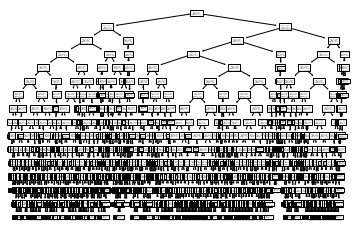

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(tree_model)
plt.show()